In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Watches_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Software_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_PC_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Music_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Video_DVD_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Beauty_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Mobile_Electronics_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Shoes_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Apparel_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Tools_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Digital_Video_Games_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/am

In [2]:

file_path = '/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv'

df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85924 entries, 0 to 85923
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        85924 non-null  object
 1   customer_id        85924 non-null  int64 
 2   review_id          85924 non-null  object
 3   product_id         85924 non-null  object
 4   product_parent     85924 non-null  int64 
 5   product_title      85920 non-null  object
 6   product_category   85924 non-null  object
 7   star_rating        85924 non-null  int64 
 8   helpful_votes      85924 non-null  int64 
 9   total_votes        85924 non-null  int64 
 10  vine               85924 non-null  object
 11  verified_purchase  85924 non-null  object
 12  review_headline    85923 non-null  object
 13  review_body        85924 non-null  object
 14  review_date        85924 non-null  object
dtypes: int64(5), object(10)
memory usage: 9.8+ MB


In [4]:
print("Original Data:")
print(df.head())

Original Data:
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32114233  R1QX6706ZWJ1P5  B00OYRW4UE       223980852   
1          US     18125776  R3QWMLJHIW6P37  B0000537JQ       819771537   
2          US     19917519  R14Z1VR1N0Z9G6  B00HXXO332       849307176   
3          US     18277171   R25ZRJL0GH0U0  B00EOB0JA2       700864740   
4          US      2593270  R3837KYH7AZNIY  B00OC2O1UC       794298839   

                                       product_title  \
0  Elite Sportz Exercise Sliders are Double Sided...   
1                                    Ezy Dose Weekly   
2               Pulse Oximeter, Blood Oxygen Monitor   
3  SE Tools Tool Kit Watch Watch Repair Kit (20 P...   
4  doTERRA HD Clear Facial Kit - Facial Lotion, F...   

           product_category  star_rating  helpful_votes  total_votes vine  \
0  Personal_Care_Appliances            5              0            0    N   
1  Personal_Care_Appliances            5         

In [5]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,8.592400e+04,8.592400e+04,85924.000000,85924.000000,85924.000000
mean,2.943395e+07,5.138159e+08,3.977236,3.351520,4.061357
std,1.525241e+07,2.919951e+08,1.433323,19.489455,20.832674
min,1.047000e+04,3.573000e+03,1.000000,0.000000,0.000000
25%,1.547730e+07,2.628535e+08,3.000000,0.000000,0.000000
50%,2.903199e+07,4.981086e+08,5.000000,0.000000,1.000000
75%,4.372740e+07,7.899794e+08,5.000000,2.000000,3.000000
max,5.309657e+07,9.999599e+08,5.000000,2785.000000,2876.000000


In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


product_title      4
review_headline    1
dtype: int64


In [7]:
df = df.drop_duplicates()


In [8]:
df = df.dropna()


In [9]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)


In [10]:
print("Cleaned Data:")
print(df.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_dataset.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned Data:
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32114233  R1QX6706ZWJ1P5  B00OYRW4UE       223980852   
1          US     18125776  R3QWMLJHIW6P37  B0000537JQ       819771537   
2          US     19917519  R14Z1VR1N0Z9G6  B00HXXO332       849307176   
3          US     18277171   R25ZRJL0GH0U0  B00EOB0JA2       700864740   
4          US      2593270  R3837KYH7AZNIY  B00OC2O1UC       794298839   

                                       product_title  \
0  Elite Sportz Exercise Sliders are Double Sided...   
1                                    Ezy Dose Weekly   
2               Pulse Oximeter, Blood Oxygen Monitor   
3  SE Tools Tool Kit Watch Watch Repair Kit (20 P...   
4  doTERRA HD Clear Facial Kit - Facial Lotion, F...   

           product_category  star_rating  helpful_votes  total_votes vine  \
0  Personal_Care_Appliances            5              0            0    N   
1  Personal_Care_Appliances            5          

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [13]:
print(df[['helpful_votes','star_rating']].describe())

       helpful_votes   star_rating
count   85919.000000  85919.000000
mean        3.351540      3.977188
std        19.490005      1.433348
min         0.000000      1.000000
25%         0.000000      3.000000
50%         0.000000      5.000000
75%         2.000000      5.000000
max      2785.000000      5.000000


In [14]:
missing_values = df[['review_headline', 'review_body', 'helpful_votes', 'star_rating']].isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


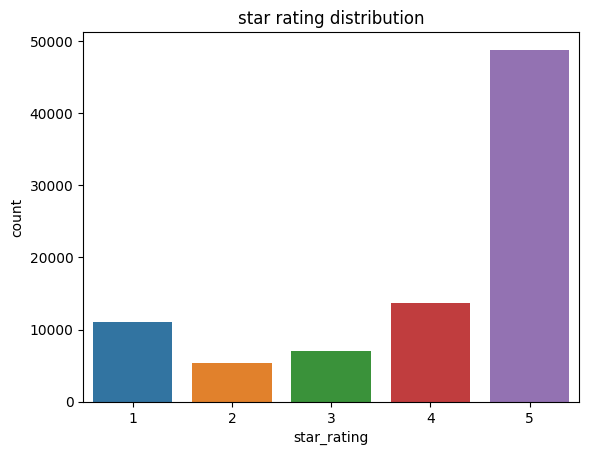

In [15]:
sns.countplot(data=df,x='star_rating')
plt.title('star rating distribution')
plt.show()

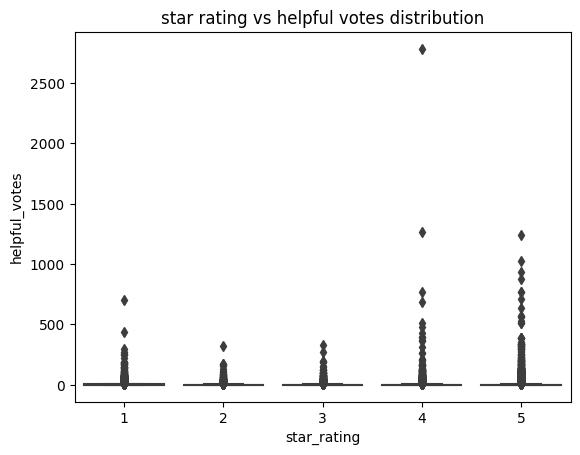

In [16]:
sns.boxplot(data=df,x='star_rating',y='helpful_votes')
plt.title('star rating vs helpful votes distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


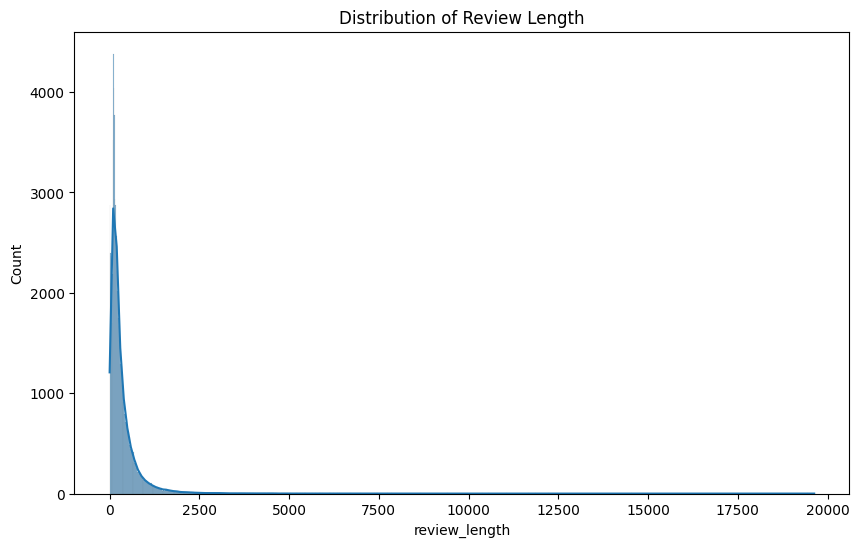

In [17]:
df['review_length'] = df['review_body'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Length')
plt.show()


In [18]:
def sentiment_analysis(rating):
  if rating in [4, 5]:
    return 'positive'
  elif rating ==3:
    return 'neutral'
  else:
    return 'negative'

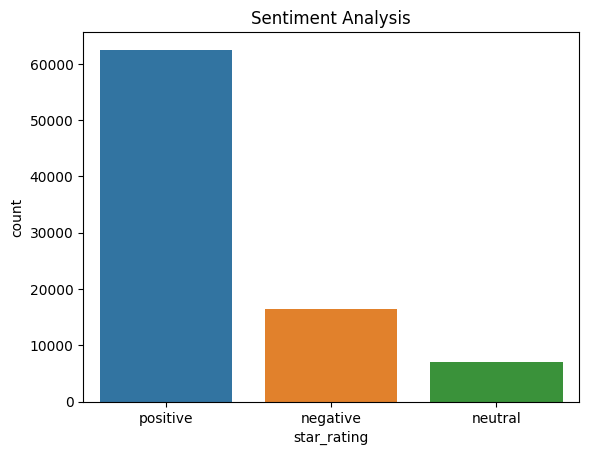

In [19]:
sns.countplot(data=df,x=df['star_rating'].apply(sentiment_analysis))
plt.title('Sentiment Analysis')
plt.show()

In [20]:
!pip install nltk
import nltk
nltk.download('stopwords')

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [21]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Fill missing values with empty string
df['review_headline'] = df['review_headline'].fillna('')
df['review_body'] = df['review_body'].fillna('')

# Apply text preprocessing
df['review_headline'] = df['review_headline'].apply(preprocess_text)
df['review_body'] = df['review_body'].apply(preprocess_text)

# Combine headline and body
df['review_text'] = df['review_headline'] + ' ' + df['review_body']

print(df[['review_headline', 'review_body', 'review_text']].head())

           review_headline                                        review_body  \
0     good quality shipped        exactly described good quality shipped fast   
1               five stars                                              great   
2  really nice works great  really nice works great option beep easy use i...   
3                two stars            kit works fine simple cheap plastic tho   
4               four stars               works better anything else ive tried   

                                         review_text  
0  good quality shipped exactly described good qu...  
1                                   five stars great  
2  really nice works great really nice works grea...  
3  two stars kit works fine simple cheap plastic tho  
4    four stars works better anything else ive tried  


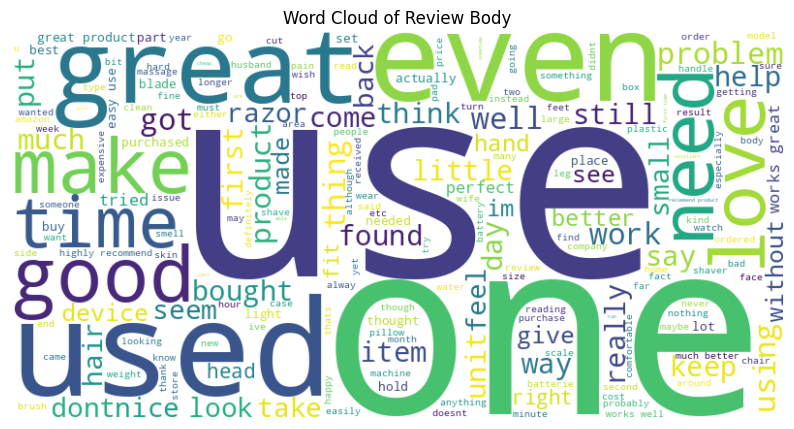

In [22]:
from wordcloud import WordCloud

text = ' '.join(df['review_body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Body')
plt.show()


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['review_text'])


In [24]:
y = df['star_rating'].apply(sentiment_analysis)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train.shape

(68735, 10000)

In [27]:
X_test.shape

(17184, 10000)

In [28]:
X_train[1]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [29]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.80      0.74      0.77      3276
     neutral       0.58      0.22      0.32      1402
    positive       0.89      0.97      0.93     12506

    accuracy                           0.86     17184
   macro avg       0.76      0.64      0.67     17184
weighted avg       0.85      0.86      0.85     17184



In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [31]:

model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

In [32]:
# Load the pretrained model
'''import pickle
model_filename = 'model.pkl'
with open(model_filename, 'rb') as file:
    logistic_model = pickle.load(file)

# Load the pretrained TF-IDF vectorizer
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'rb') as file:
    vectorizer = pickle.load(file)'''

"import pickle\nmodel_filename = 'model.pkl'\nwith open(model_filename, 'rb') as file:\n    logistic_model = pickle.load(file)\n\n# Load the pretrained TF-IDF vectorizer\nvectorizer_filename = 'tfidf_vectorizer.pkl'\nwith open(vectorizer_filename, 'rb') as file:\n    vectorizer = pickle.load(file)"